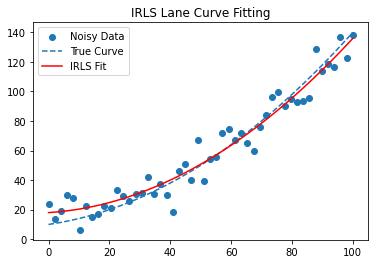

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../functions")

from irls import irls_fit

# Generate noisy lane-like data
np.random.seed(0)
x = np.linspace(0, 100, 50)
y_true = 0.01 * x**2 + 0.3 * x + 10
y_noisy = y_true + np.random.randn(*x.shape) * 8

# Fit curve using IRLS
beta = irls_fit(x, y_noisy)
X_poly = np.vstack([x**i for i in range(2, -1, -1)]).T
y_fit = X_poly @ beta

# Plot results
plt.scatter(x, y_noisy, label="Noisy Data")
plt.plot(x, y_true, label="True Curve", linestyle="dashed")
plt.plot(x, y_fit, label="IRLS Fit", color="red")
plt.legend()
plt.title("IRLS Lane Curve Fitting")
plt.show()


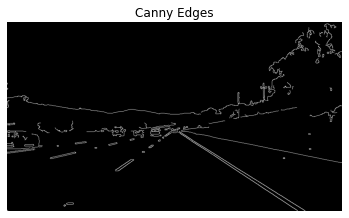

In [2]:
import cv2

# Load and preprocess image
img = cv2.imread("../data/solidWhiteRight.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')
plt.show()


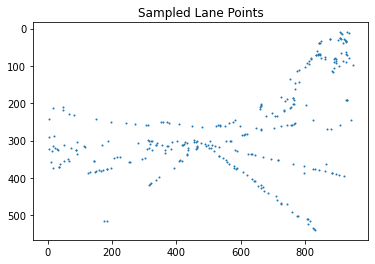

In [3]:
# Get coordinates of edge pixels
points = np.column_stack(np.where(edges > 0))
# Note: OpenCV uses (row, col) = (y, x)
y_coords = points[:, 0]
x_coords = points[:, 1]

# Downsample to reduce noise
idx = np.random.choice(len(x_coords), size=300, replace=False)
x_sample = x_coords[idx]
y_sample = y_coords[idx]

plt.scatter(x_sample, y_sample, s=1)
plt.gca().invert_yaxis()
plt.title("Sampled Lane Points")
plt.show()


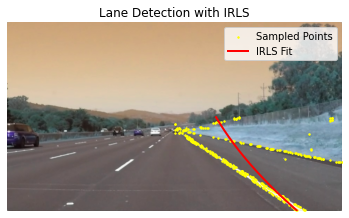

In [4]:
# Get edge coordinates
y_coords, x_coords = np.where(edges > 0)

# Filter to bottom right region
mask = (y_coords > img.shape[0] * 0.5) & (x_coords > img.shape[1] * 0.5)
x_filtered = x_coords[mask]
y_filtered = y_coords[mask]

# Sample some points
idx = np.random.choice(len(x_filtered), size=300, replace=False)
x_sample = x_filtered[idx]
y_sample = y_filtered[idx]

# Fit x = f(y)
from irls import irls_fit
beta = irls_fit(y_sample, x_sample)

# Predict curve
y_fit = np.linspace(min(y_sample), max(y_sample), 200)
X_poly = np.vstack([y_fit**i for i in range(2, -1, -1)]).T
x_fit = X_poly @ beta

# Plot over image
plt.imshow(img)
plt.scatter(x_sample, y_sample, s=2, c='yellow', label="Sampled Points")
plt.plot(x_fit, y_fit, color='red', linewidth=2, label="IRLS Fit")
plt.title("Lane Detection with IRLS")
plt.axis('off')
plt.legend()
plt.show()


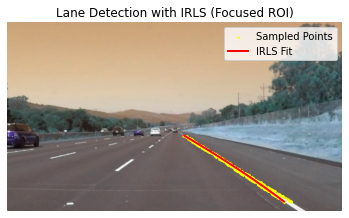

In [5]:
def region_of_interest(img):
    h, w = img.shape[:2]
    mask = np.zeros_like(img)
    polygon = np.array([[
        (int(w * 0.1), int(h * 0.95)),
        (int(w * 0.45), int(h * 0.6)),
        (int(w * 0.55), int(h * 0.6)),
        (int(w * 0.9), int(h * 0.95))
    ]], dtype=np.int32)
    cv2.fillPoly(mask, polygon, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked
edges_roi = region_of_interest(edges)
y_coords, x_coords = np.where(edges_roi > 0)

# Filter to bottom right region
mask = (y_coords > img.shape[0] * 0.5) & (x_coords > img.shape[1] * 0.5)
x_filtered = x_coords[mask]
y_filtered = y_coords[mask]

# Sample some points
idx = np.random.choice(len(x_filtered), size=300, replace=False)
x_sample = x_filtered[idx]
y_sample = y_filtered[idx]

# Fit x = f(y)
beta = irls_fit(y_sample, x_sample)

# Predict curve
y_fit = np.linspace(min(y_sample), max(y_sample), 200)
X_poly = np.vstack([y_fit**i for i in range(2, -1, -1)]).T
x_fit = X_poly @ beta

# Plot over image
plt.imshow(img)
plt.scatter(x_sample, y_sample, s=2, c='yellow', label="Sampled Points")
plt.plot(x_fit, y_fit, color='red', linewidth=2, label="IRLS Fit")
plt.title("Lane Detection with IRLS (Focused ROI)")
plt.axis('off')
plt.legend()
plt.show()
